In [1]:
import json
import os
import shutil
import matplotlib.pyplot as plt
import numpy as np
import cv2

json_path = "../airport_chips/"
planes_path = "../airport_crop/"

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


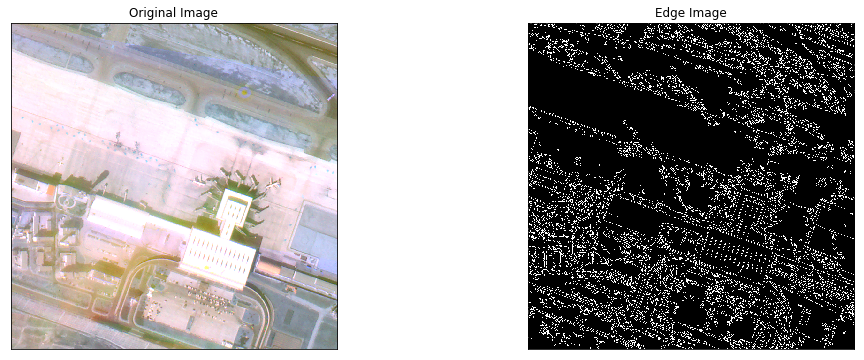

In [2]:
# Detecting edges 
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('../airport_crop/30.png')
# print(img)
edges = cv2.Canny(img,0,200)
print(edges)
plt.figure(figsize=(17,6))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


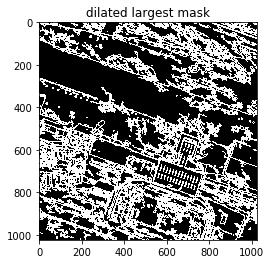

[[False False False ... False False False]
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [3]:
# Dilating the edges 
import numpy as np
import imageio
import h5py
import matplotlib.pyplot as plt
from PIL import Image
from scipy.misc import bytescale
import os, glob
import scipy.misc
import scipy.ndimage
import pandas as pd
import copy
iterations = 1 # experiment with this number!
dilated_edges = scipy.ndimage.morphology.binary_dilation(edges,
                                                        iterations=iterations*2)
plt.imshow(dilated_edges, cmap="gray")
plt.title('dilated largest mask')
plt.show()
# b = np.zeros(a.shape)
print(dilated_edges)

[[0 0 0 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(1024, 1024)


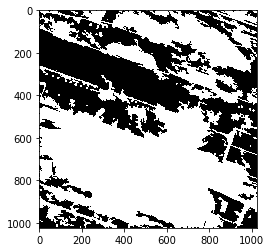

In [4]:
# Fill hole
img_mask = scipy.ndimage.morphology.binary_fill_holes(dilated_edges).astype(int)
plt.imshow(img_mask, cmap="gray")
print(img_mask)
print(img_mask.shape)

795 847 480 533
[[ True  True  True ...  True  True  True]
 [ True  True  True ... False  True  True]
 [ True  True  True ... False  True  True]
 ...
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]]


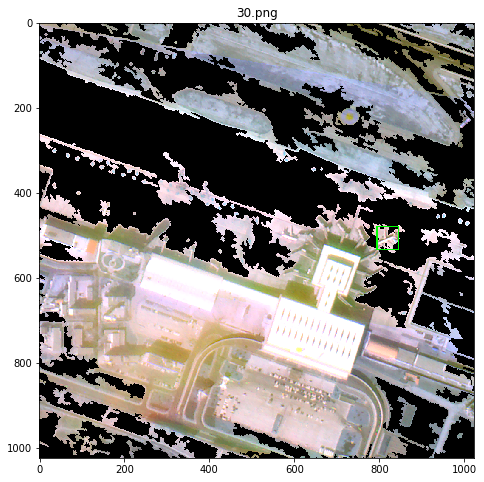

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ..., False,  True,  True],
       [ True,  True,  True, ..., False,  True,  True],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])

In [5]:
# Check if this mask retains the boxes
import copy
f = open('../airport_chips/30.json')
tags = json.load(f)
f.close()
tags["imageData"] = tags["imageData"][:80]+"..."
i = 0
img = cv2.imread(planes_path+tags["imagePath"])
img[img_mask == 0] = (0,0,0)
for sh in tags["shapes"]:
    
    i += 1
    if i !=3:
        continue
    p = sh["points"]
    x1, x2 = int(p[0][0]//1), int(p[1][0]//1+1)
    y1, y2 = int(p[0][1]//1+1), int(p[1][1]//1)
    print(x1,x2,y1,y2)
    print(img_mask[ y1:y2+1, x1:x2] == 1)
    color = (0,255,0)
    cv2.rectangle(img, (int(p[0][0]),int(p[0][1])), (int(p[1][0]),int(p[1][1])), color, 2)
#     print(np.product(img_mask == a))
#     print('-'*10)
#     print(img_mask)
#     out_rgb = img_mask[:,::-1].copy()
    plt.figure(figsize=(8,8))
    plt.imshow(img, cmap="gray")
    plt.title(tags["imagePath"])
    plt.show()
    
    
    
    
# img = cv2.imread('../airport_crop/30.png')
# result = img.copy()
# result[img_mask==0] = (0,0,0)
# plt.imshow(result)
# plt.show()
# color = (0,255,0)
# cv2.rectangle(result, (200,200), (800,800), color, 2)
# plt.imshow(result)
# plt.show()
img_mask[ y1:y2+1, x1:x2] == 1